In [32]:
import pandas as pd
import numpy as np

titanic = pd.read_csv(r'D:\Py_Project\Langcahin\机器学习\pag\dataset.txt')
# titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

titanic.head()

,row.names,pclass,survived,name,age,embarked,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,male


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  550 non-null    int64  
 1   pclass     550 non-null    object 
 2   survived   550 non-null    int64  
 3   name       550 non-null    object 
 4   age        538 non-null    float64
 5   embarked   549 non-null    object 
 6   sex        550 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 30.2+ KB


In [34]:
titanic.isnull().sum()

row.names     0
pclass        0
survived      0
name          0
age          12
embarked      1
sex           0
dtype: int64

In [36]:
X = titanic[['pclass','age','sex']]
y = titanic['survived']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  550 non-null    object 
 1   age     538 non-null    float64
 2   sex     550 non-null    object 
dtypes: float64(1), object(2)
memory usage: 13.0+ KB


In [39]:
X['age'] = X['age'].fillna(X['age'].mean())
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  550 non-null    object 
 1   age     550 non-null    float64
 2   sex     550 non-null    object 
dtypes: float64(1), object(2)
memory usage: 13.0+ KB


C:\Users\cai\AppData\Local\Temp\ipykernel_22196\1789720028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].fillna(X['age'].mean())


In [40]:
print(X['pclass'].value_counts())
print(y.value_counts())

pclass
1st    200
2nd    200
3rd    150
Name: count, dtype: int64
survived
0    304
1    246
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='age'>

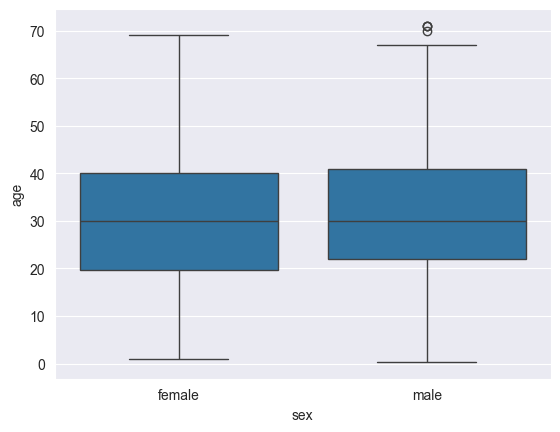

In [41]:
import seaborn as sns
sns.boxplot(x = 'sex', y = 'age', data = X)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

vec = DictVectorizer(sparse=False)
X_train = vec.fit_transform(X_train.to_dict(orient='records'))
X_test = vec.transform(X_test.to_dict(orient='records'))
print(vec.feature_names_)


['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']


In [ ]:
# ['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']

In [45]:
# 导入随机森林分类器
from sklearn.ensemble import RandomForestClassifier

# 初始化随机森林分类器
rfc = RandomForestClassifier()

# 训练模型
rfc.fit(X_train, y_train)

# 预测测试集
rfc_y_pred = rfc.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

# 打印随机森林模型的准确率
print("The accuracy of RandomForest:", rfc.score(X_test, y_test))

# 打印分类报告（包含精确率、召回率、F1-score等指标）
print(classification_report(rfc_y_pred, y_test))

The accuracy of RandomForest: 0.8115942028985508
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        81
           1       0.75      0.82      0.78        57

    accuracy                           0.81       138
   macro avg       0.81      0.81      0.81       138
weighted avg       0.82      0.81      0.81       138

